# Heart Attack Prediction Case Study
## Seminar 5, Data Science Case Study
__Week 9__, 25/04/15

### __Problem definition:__ Predict whether a patient will have a heart attack or not


## Dataset description: 

| **Feature**     | **Description**                                                                                         | **Values**                                                                                 |
|------------------|---------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **Age**         | Age of the individual.                                                                                  | Numerical                                                                                 |
| **Sex**         | Biological sex of the individual.                                                                       | Male, Female                                                                              |
| **exang**       | Whether the individual experiences chest pain caused by exercise (indicates potential heart problems).  | 1 = Yes, 0 = No                                                                          |
| **ca**          | Number of major blood vessels that show narrowing or blockage (higher value = more severe issues).      | 0 to 3                                                                                   |
| **cp**          | Type of chest pain experienced.                                                                         | 1 = Typical angina (heart-related pain)                                                  |
|                  |                                                                                                         | 2 = Atypical angina (not directly related to heart issues)                               |
|                  |                                                                                                         | 3 = Non-anginal pain (unrelated to the heart)                                            |
|                  |                                                                                                         | 4 = Asymptomatic (no chest pain)                                                        |
| **trtbps**      | Resting blood pressure (in mm Hg). Reflects blood force on vessel walls while at rest.                  | Numerical                                                                                 |
| **chol**        | Cholesterol level in blood (mg/dl). High values indicate a higher risk of heart disease.                | Numerical                                                                                 |
| **fbs**         | Fasting blood sugar level (>120 mg/dl indicates possible diabetes).                                     | 1 = True, 0 = False                                                                      |
| **rest_ecg**    | Resting electrocardiogram results (measures heart's electrical activity).                               | 0 = Normal                                                                               |
|                  |                                                                                                         | 1 = Abnormalities in heart signals (e.g., irregular heartbeat)                          |
|                  |                                                                                                         | 2 = Enlarged heart due to strain/damage                                                 |
| **thalach**     | Maximum heart rate achieved during physical activity (lower values may indicate weaker performance).    | Numerical                                                                                 |
| **target**      | Likelihood of heart problems based on all factors.                                                      | 0 = Lower chance of heart attack                                                         |
|                  |                                                                                                         | 1 = Higher chance of heart attack                                                       |


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn # scikit-learn might work instead
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# !pip3 install sklearn 

## Data Preparation

In [54]:
data = pd.read_csv("Seminar_data/heart.csv")
o2_saturation = pd.read_csv("Seminar_data/o2Saturation.csv")

In [5]:
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print(o2_saturation.shape)
o2_saturation.head()

(3585, 1)


,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Exploratory Data Analysis (EDA)

In [8]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

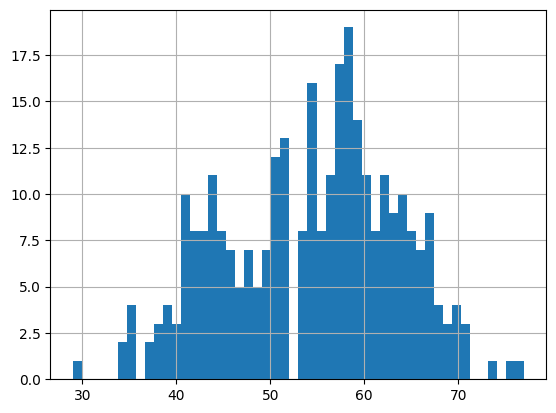

In [60]:
data['age'].hist(bins=50)

<Axes: >

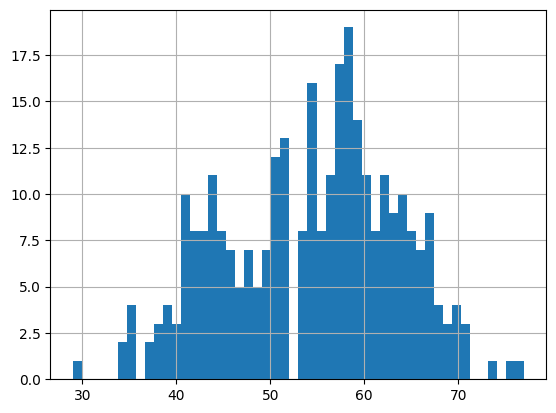

In [9]:
# what is the distribution of age column?
data["age"].hist(bins=50)

In [63]:
len(data)

303

In [67]:
print(f'Male ratio: {round(data['sex'].sum()/len(data), 2)}')


Male ratio: 0.68


In [75]:
round(data['sex'].value_counts(normalize=True), 2)

sex
1    0.68
0    0.32
Name: proportion, dtype: float64

In [11]:
##  What is the share between males and females in the sample?
#round(data["sex"].value_counts(normalize=True), 2)
print(f'Male ratio: {round(data.sex.sum()/len(data),2)}')
print(f'Female ratio: {round(1 - data.sex.sum()/len(data),2)}')

Male ratio: 0.68
Female ratio: 0.32


In [12]:
round(data['sex'].value_counts(normalize=True), 2)

sex
1    0.68
0    0.32
Name: proportion, dtype: float64

In [13]:
## Check if classes are balanced or not
round(data["output"].value_counts(normalize=True), 2)

output
1    0.54
0    0.46
Name: proportion, dtype: float64

In [79]:
o2_saturation

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [80]:
## Add o2_saturation data in the data frame 'data'
# o2_saturation.rename(columns={'98.6':'o2_saturation'}, inplace = True)
# data = pd.concat([data, o2_saturation], axis=1)
data["o2_Saturation"] = o2_saturation
print(data.shape)
data.head()

(303, 15)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


<Axes: >

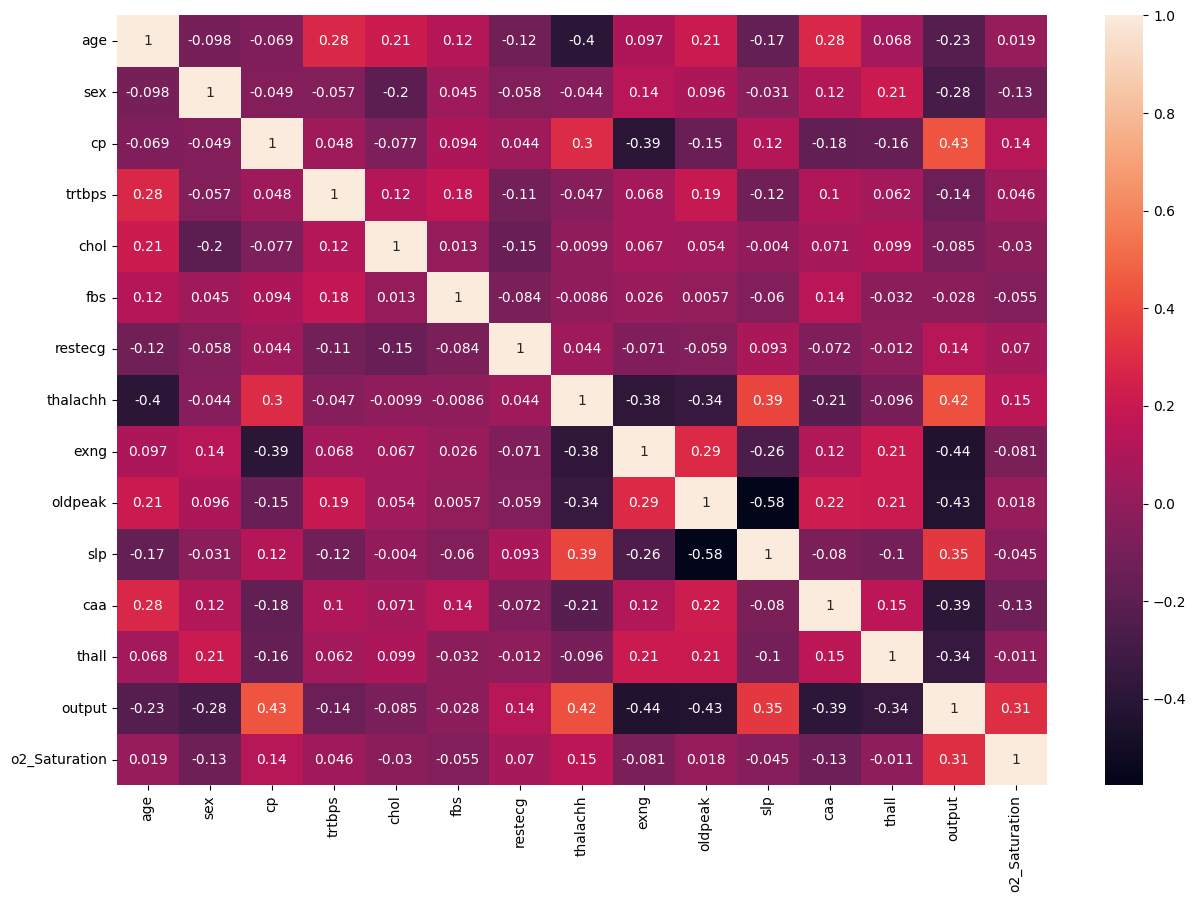

In [15]:
corr = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

In [81]:
# Specify X and y and split the dataset
X = data.drop("output", axis=1)
y = data["output"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state  = 42)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 14), (91, 14), (212,), (91,))

In [83]:
y_train

124    1
72     1
15     1
10     1
163    1
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 212, dtype: int64

## Modeling
Using __Random Forest Classifier__

### Random Forest Classifier

#### Overview
Used for both classification and regression tasks. 

It is an ensemble method that builds multiple decision trees and merges their predictions to achieve better accuracy and reduce the risk of overfitting.

#### How it Works
1. **Data Sampling**: Random subsets of the training data are created using bootstrapping.
2. **Tree Construction**: A decision tree is built for each subset, considering only a random subset of features at each split.
3. **Prediction**:
   - **Classification**: The final prediction is based on majority voting across all trees.
   - **Regression**: The final prediction is the average of all tree predictions.

#### Advantages
- Handles high-dimensional data well.
- Works well with both numerical and categorical data.
- Provides feature importance scores, helping in feature selection.

#### Disadvantages
- Requires more computational resources due to multiple trees.
- Less interpretable than a single decision tree.
- May not perform well on highly imbalanced datasets without proper preprocessing.


In [84]:
# specify model
forest = RandomForestClassifier(random_state  = 42)

# train model
forest.fit(X_train, y_train) # coefficients

# make prediction
forest_preds = forest.predict(X_test)

In [20]:
forest_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1])

### Evaluate the result

In [86]:
Y

,real,pred
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
250,0,0
19,1,1
143,1,0
79,1,1


In [87]:
# Manually calculate number of True positive and False negative predictions
Y = pd.DataFrame()
Y['real'] = y_test
Y['pred'] = forest_preds
print(len(Y[(Y.real==1)&(Y.pred==1)]))
print(len(Y[(Y.real==0)&(Y.pred==0)]))
print(len(Y[(Y.real==1)&(Y.pred==0)]))
print(len(Y[(Y.real==0)&(Y.pred==1)]))

43
32
7
9


In [22]:
len(Y[(Y.real==1)&(Y.pred==1)])

43

Text(0.5, 1.0, 'Confusion Matrix')

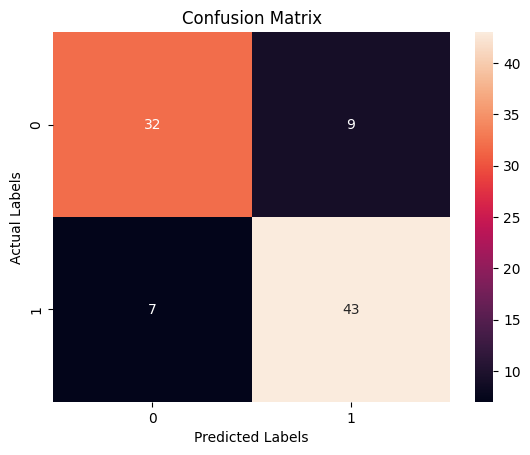

In [23]:
sns.heatmap(confusion_matrix(y_test, forest_preds), annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")

In [24]:
# Based on the confusion matrics fill:
true_positive = 43
true_negative = 32
false_positive = 9
false_negative = 7

### Evaluation Metrics
#### Precision
**Description**: Precision measures the proportion of correctly identified positive instances among all instances predicted as positive. It focuses on how accurate the positive predictions are.

**Rationale**: High precision means fewer false positives, which is crucial in scenarios like spam detection or medical diagnosis where false positives can have significant consequences.

**Formula**:  
$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$


In [25]:
print(round(true_positive/(true_positive + false_positive),2))
print(round(sklearn.metrics.precision_score(y_test, forest_preds), 2))

0.83
0.83


#### Recall (Our focus)
**Description**: Recall, or sensitivity, measures the proportion of correctly identified positive instances out of all actual positive instances.

**Rationale**: High recall ensures fewer false negatives, important in cases like disease detection where missing a positive case can be critical.

**Formula**:  
$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

In [26]:
print(round(true_positive/(true_positive + false_negative),2))
print(round(sklearn.metrics.recall_score(y_test, forest_preds), 2))

0.86
0.86


#### F1 Score
**Description**: The F1 Score is the harmonic mean of Precision and Recall, balancing both metrics. It is used when there’s a need to balance precision and recall, especially in cases with imbalanced datasets.

**Rationale**: The F1 score gives a single performance metric that penalizes extreme values of Precision or Recall.

**Formula**:  
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

In [27]:
print(round(2*(0.83*0.86)/(0.83+0.86),2))
print(round(sklearn.metrics.f1_score(y_test, forest_preds), 2))

0.84
0.84


#### Accuracy
**Description**: Accuracy measures the proportion of correctly classified instances (both positive and negative) out of all instances.

**Rationale**: Accuracy is a simple metric but can be misleading on imbalanced datasets, as it doesn’t distinguish between types of errors.

**Formula**:  
$$
\text{Accuracy} = \frac{\text{True Positives (TP)} + \text{True Negatives (TN)}}{\text{Total Instances}}
$$

In [28]:
print(round((true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative),2))
print(round(sklearn.metrics.accuracy_score(y_test, forest_preds), 2))

0.82
0.82


### Result Saving

In [88]:
# create empty dataframe with indexes: ['precision','recall', 'f1_score','accuracy']
result = pd.DataFrame(index=['precision','recall', 'f1_score','accuracy'])
result

""
precision
recall
f1_score
accuracy


In [30]:
# write a function which will return 4 metrics:
# [round(sklearn.metrics.precision_score(y_test, forest_preds), 2),round(sklearn.metrics.recall_score(y_test, forest_preds), 2),round(sklearn.metrics.f1_score(y_test, forest_preds), 2),round(sklearn.metrics.accuracy_score(y_test, forest_preds), 2)]


def eval_result(x_predicted):
    return [round(sklearn.metrics.precision_score(y_test, x_predicted), 2),
            round(sklearn.metrics.recall_score(y_test, x_predicted), 2),
            round(sklearn.metrics.f1_score(y_test, x_predicted), 2),
            round(sklearn.metrics.accuracy_score(y_test, x_predicted), 2)]

In [31]:
# add the result of model_1 into the df 'result'
result['model_first'] = eval_result(forest_preds)
result

,model_first
precision,0.83
recall,0.86
f1_score,0.84
accuracy,0.82


In [32]:
forest.predict(X_test)[:5]

array([0, 1, 1, 0, 1])

In [33]:
res_proba = forest.predict_proba(X_test)
res_proba[:5]

array([[0.9 , 0.1 ],
       [0.33, 0.67],
       [0.36, 0.64],
       [0.93, 0.07],
       [0.27, 0.73]])

## Hyperparameter tuning

### Change the threshold

In [90]:
res_proba

array([[0.9 , 0.1 ],
       [0.33, 0.67],
       [0.36, 0.64],
       [0.93, 0.07],
       [0.27, 0.73],
       [0.1 , 0.9 ],
       [0.24, 0.76],
       [0.98, 0.02],
       [0.92, 0.08],
       [0.44, 0.56],
       [0.2 , 0.8 ],
       [0.72, 0.28],
       [0.11, 0.89],
       [0.85, 0.15],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.46, 0.54],
       [0.87, 0.13],
       [0.43, 0.57],
       [0.27, 0.73],
       [0.3 , 0.7 ],
       [0.41, 0.59],
       [0.21, 0.79],
       [0.18, 0.82],
       [0.86, 0.14],
       [0.25, 0.75],
       [0.91, 0.09],
       [0.9 , 0.1 ],
       [0.97, 0.03],
       [0.55, 0.45],
       [0.28, 0.72],
       [0.86, 0.14],
       [0.34, 0.66],
       [0.16, 0.84],
       [0.41, 0.59],
       [0.21, 0.79],
       [0.19, 0.81],
       [0.19, 0.81],
       [0.19, 0.81],
       [0.29, 0.71],
       [0.25, 0.75],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.02,

In [91]:
# get the result for a threshold = 0.7
res_pred = [0 if i[0]>=0.7 else 1 for i in res_proba]
print("Presenting result in a format [precision, recall, F-1, accuracy]:")
for i in eval_result(res_pred):
    print(float(i))

Presenting result in a format [precision, recall, F-1, accuracy]:
0.8
0.94
0.86
0.84


In [35]:
res_proba[0]

array([0.9, 0.1])

In [96]:
[x/10 for x in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [97]:
# Generate results for any threshold from 0.1 till 0.9 and add it into 'result' df
res_proba = forest.predict_proba(X_test)

for t in [x/10 for x in range(1, 10)]:
    print(t)
    res_pred = [0 if i[0]>=t else 1 for i in res_proba]
    result[f'model_thr_{t}'] = eval_result(res_pred)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [98]:
result

,model_thr_0.1,model_thr_0.2,model_thr_0.3,model_thr_0.4,model_thr_0.5,model_thr_0.6,model_thr_0.7,model_thr_0.8,model_thr_0.9
precision,1.00,0.96,0.95,0.87,0.83,0.84,0.80,0.73,0.64
recall,0.16,0.44,0.70,0.78,0.86,0.92,0.94,0.98,0.98
f1_score,0.28,0.60,0.80,0.82,0.84,0.88,0.86,0.84,0.78
accuracy,0.54,0.68,0.81,0.81,0.82,0.86,0.84,0.79,0.69


In [99]:
result.T.sort_values('recall', ascending=False)

,precision,recall,f1_score,accuracy
model_thr_0.8,0.73,0.98,0.84,0.79
model_thr_0.9,0.64,0.98,0.78,0.69
model_thr_0.7,0.80,0.94,0.86,0.84
model_thr_0.6,0.84,0.92,0.88,0.86
model_thr_0.5,0.83,0.86,0.84,0.82
model_thr_0.4,0.87,0.78,0.82,0.81
model_thr_0.3,0.95,0.70,0.80,0.81
model_thr_0.2,0.96,0.44,0.60,0.68
model_thr_0.1,1.00,0.16,0.28,0.54


### Using RandomizedSearchCV for hyperparameter turning

### Hyperparameters
Key hyperparameters to tune in Random Forest:

1. `n_estimators`
- Description: The number of trees in the Random Forest.
- Impact: A higher number of trees increases model accuracy but also computational cost. Commonly tuned to find a balance between performance and efficiency.

2. `max_depth`
- Description: The maximum depth of each tree in the forest.
- Impact: Limits the growth of trees to avoid overfitting. Shallower trees generalize better but may underfit the data.

3. `max_features`
- Description: The number of features to consider when splitting a node.
- "sqrt": Considers the square root of the total number of features.
- "log2": Considers the logarithm (base 2) of the total number of features.
- "None": Considers all features
- Impact: Controls how the model selects features, impacting diversity among trees and overall performance.

4. `min_samples_split`
- Description: The minimum number of samples required to split an internal node.
- Impact: Higher values restrict tree splitting, preventing overfitting but increasing the risk of underfitting.

5. `min_samples_leaf`
- Description: The minimum number of samples required to be in a leaf node.
- Impact: Larger values prevent the model from learning overly specific patterns, improving generalization but potentially missing finer details.

In [100]:
estimator = RandomForestClassifier()
grid = {"n_estimators": [50, 60, 70, 80, 90, 100, 110, 120],
        "max_depth": [3, 5, 7, 9, 11, 13, 15],
        "max_features" : ["sqrt", "log2", None],
        "min_samples_split": [2, 3, 4, 5],
        "min_samples_leaf": [1, 2, 3, 4]}

rand_search_model = RandomizedSearchCV(estimator=estimator,
                                      param_distributions=grid)

In [101]:
# Retrain the model with tuned parameters and compare with model 1
rand_search_model.fit(X_train, y_train)
rand_search_pred = rand_search_model.predict(X_test)

In [102]:
rand_search_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 3}

In [103]:
result['model_hp_tuned'] = eval_result(rand_search_pred)
result.T.sort_values('accuracy', ascending=False)

,precision,recall,f1_score,accuracy
model_thr_0.6,0.84,0.92,0.88,0.86
model_hp_tuned,0.85,0.88,0.86,0.85
model_thr_0.7,0.80,0.94,0.86,0.84
model_thr_0.5,0.83,0.86,0.84,0.82
model_thr_0.3,0.95,0.70,0.80,0.81
model_thr_0.4,0.87,0.78,0.82,0.81
model_thr_0.8,0.73,0.98,0.84,0.79
model_thr_0.9,0.64,0.98,0.78,0.69
model_thr_0.2,0.96,0.44,0.60,0.68
model_thr_0.1,1.00,0.16,0.28,0.54


### Feature importance

In [104]:
importances = forest.feature_importances_

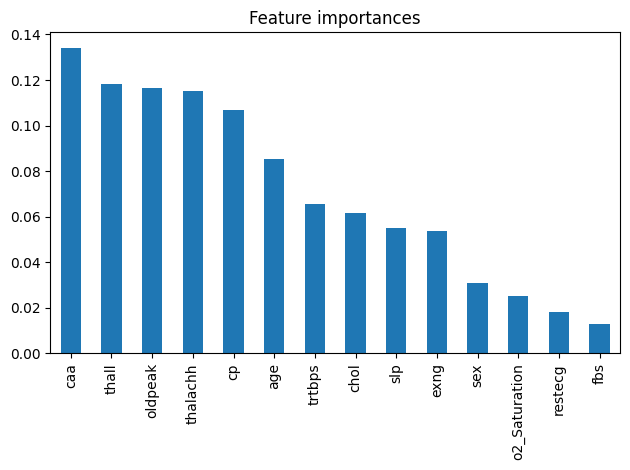

In [105]:
forest_importances = pd.Series(importances, index = X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [106]:
# Drop the least important feature and compare the result with model 1
X_test_short = X_test.drop(['fbs', 'restecg'], axis=1)
X_train_short = X_train.drop(['fbs', 'restecg'], axis=1)

In [107]:
feat_model = rand_search_model.fit(X_train_short, y_train)
feat_pred = feat_model.predict(X_test_short)

In [108]:
result['model_features_tuned'] = eval_result(feat_pred)
result.T.sort_values('accuracy', ascending=False)

,precision,recall,f1_score,accuracy
model_thr_0.6,0.84,0.92,0.88,0.86
model_hp_tuned,0.85,0.88,0.86,0.85
model_thr_0.7,0.80,0.94,0.86,0.84
model_thr_0.5,0.83,0.86,0.84,0.82
model_thr_0.3,0.95,0.70,0.80,0.81
model_thr_0.4,0.87,0.78,0.82,0.81
model_features_tuned,0.83,0.80,0.82,0.80
model_thr_0.8,0.73,0.98,0.84,0.79
model_thr_0.9,0.64,0.98,0.78,0.69
model_thr_0.2,0.96,0.44,0.60,0.68


## Best Model Presentation

Let's use our knowledge to produce the final model

In [109]:
# Define the parameters
final_classifier = RandomForestClassifier(
    n_estimators=70,       
    max_depth=3,         
    min_samples_split=4,     
    min_samples_leaf=3,     
    max_features='log2',    
    random_state=42)

# Fit the model to your training data restricted with one of the variables
final_classifier.fit(X_train_short, y_train)

# Generate predictions 
final_probs = final_classifier.predict_proba(X_test_short)

# Use best threshold
final_preds = [0 if i[0] >= 0.6 else 1 for i in final_probs]

In [110]:
result2 = pd.DataFrame(index=['precision','recall', 'f1_score','accuracy'])
for t in [x/10 for x in range(1, 10)]:
    print(t)
    final_pred = [0 if i[0]>=t else 1 for i in final_probs]
    result2[f'final_model_thr_{t}'] = eval_result(final_pred)
result2.T

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


,precision,recall,f1_score,accuracy
final_model_thr_0.1,1.00,0.06,0.11,0.48
final_model_thr_0.2,0.93,0.26,0.41,0.58
final_model_thr_0.3,0.93,0.56,0.70,0.74
final_model_thr_0.4,0.90,0.74,0.81,0.81
final_model_thr_0.5,0.83,0.90,0.87,0.85
final_model_thr_0.6,0.84,0.92,0.88,0.86
final_model_thr_0.7,0.79,0.98,0.88,0.85
final_model_thr_0.8,0.68,0.98,0.80,0.74
final_model_thr_0.9,0.58,1.00,0.74,0.60


In [52]:
result['model_final'] = eval_result(final_preds)
result.T.sort_values('accuracy', ascending=False)

,precision,recall,f1_score,accuracy
model_thr_0.6,0.84,0.92,0.88,0.86
model_final,0.84,0.92,0.88,0.86
model_thr_0.7,0.80,0.94,0.86,0.84
model_features_tuned,0.83,0.88,0.85,0.84
model_first,0.83,0.86,0.84,0.82
model_thr_0.5,0.83,0.86,0.84,0.82
model_thr_0.3,0.95,0.70,0.80,0.81
model_thr_0.4,0.87,0.78,0.82,0.81
model_hp_tuned,0.84,0.82,0.83,0.81
model_thr_0.8,0.73,0.98,0.84,0.79


Text(0.5, 1.0, 'Final Model Confusion Matrix')

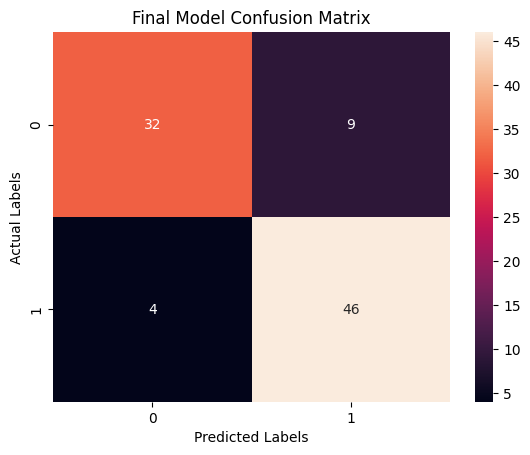

In [111]:
# Let's see the confusion matrix for the final model
sns.heatmap(confusion_matrix(y_test, final_preds), annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Final Model Confusion Matrix")